Нахождение bbox для отдельных частей тела: лица, губ, носа, правого глаза. левого глаза, бровей   
лицо 0-40   
нос 41-57   
губы 58-113   
правый глаз 114-134   
левый глаз 135-153   
правая бровь 154-174   
левая бровь 175 -194   

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [2]:
DIR_TRAIN = './data/train'
DIR_TEST = './data/test'
TRAIN_PATH = "./data/train/images"
TEST_PATH  = "./data/test/images"

In [3]:
landmarks = pd.read_csv(os.path.join(DIR_TRAIN, 'landmarks_train.csv'))

In [4]:
landmarks = pd.read_csv('pred_test.csv')

In [5]:
points_faces = list(range(0,41))
points_noses = list(range(41,58))
points_lips = list(range(58,114))
points_r_eye = list(range(114,135))
points_l_eye = list(range(135,154))
points_r_eyebrow = list(range(154,175))
points_l_eyebrow = list(range(175,194))

In [6]:
print(len(points_faces))
print(len(points_noses))
print(len(points_lips))
print(len(points_r_eye))
print(len(points_l_eye))
print(len(points_r_eyebrow))
print(len(points_l_eyebrow))

41
17
56
21
19
21
19


In [7]:
landmarks

,file_name,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,...,Point_M189_X,Point_M189_Y,Point_M190_X,Point_M190_Y,Point_M191_X,Point_M191_Y,Point_M192_X,Point_M192_Y,Point_M193_X,Point_M193_Y
0,296814969_3.jpg,280,397,283,411,287,418,291,432,294,...,378,320,389,320,400,320,407,323,418,323
1,2968560214_1.jpg,669,518,661,542,661,566,653,598,645,...,530,371,506,371,490,379,466,379,450,379
2,2968784797_1.jpg,433,1788,433,1869,2443,1937,2416,1991,2416,...,945,1235,2025,1154,1971,1181,1917,1208,1836,1208
3,296961468_1.jpg,835,1471,835,1512,842,1552,856,1593,869,...,1201,1166,1242,1166,1283,1166,1323,1180,1378,1180
4,2970690152_2.jpg,1029,766,1029,785,1022,805,1016,824,1016,...,895,613,882,613,863,613,850,613,837,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,3260548295_1.jpg,1163,906,1149,920,1149,941,1134,963,1120,...,1106,730,1099,723,1070,723,1052,716,1038,716
326,3260548295_2.jpg,350,463,350,472,350,489,350,502,354,...,393,379,406,379,412,379,421,383,430,383
327,3261640996_1.jpg,570,787,577,809,584,830,591,858,599,...,681,634,702,634,723,634,738,634,752,634
328,3262777136_1.jpg,429,357,425,369,421,381,421,396,417,...,368,266,357,266,345,270,337,270,326,274


In [8]:
def minmax_somelandmarks(x):
    list_points = points_lips
    list_coords_x = [x[f"Point_M{id_point}_X"] for id_point in list_points]
    list_coords_y = [x[f"Point_M{id_point}_Y"] for id_point in list_points]
    x_min = min(list_coords_x)
    x_max = max(list_coords_x)
    y_min = min(list_coords_y)
    y_max = max(list_coords_y)
    return [x_min, y_min, x_max, y_max]
landmarks['rect_lips'] = landmarks.apply(minmax_somelandmarks, axis=1)

In [9]:
landmarks['rect_lips']

0          [403, 452, 498, 491]
1          [243, 682, 450, 769]
2      [1229, 2314, 1944, 2571]
3      [1310, 1735, 1669, 1925]
4          [645, 866, 824, 906]
                 ...           
325      [798, 963, 1009, 1052]
326        [421, 547, 540, 586]
327        [752, 873, 962, 969]
328        [211, 404, 314, 457]
329     [958, 1128, 1176, 1218]
Name: rect_lips, Length: 330, dtype: object

In [13]:
import re
def expand_bbox(x):
    r = np.array(re.findall("([0-9]+[.]?[0-9]*)", x))
    if len(r) == 0:
        r = [-1, -1, -1, -1]
    return r

In [14]:
pd.DataFrame(np.stack(landmarks['rect_lips'].apply(lambda x: expand_bbox(x))))

TypeError: expected string or bytes-like object

In [32]:
landmarks.to_csv(os.path.join(DIR_TRAIN, 'landmarks_train.csv'), index=False)

In [21]:
def expand_bbox(x):
    r = np.array(re.findall("([0-9]+[.]?[0-9]*)", x), dtype=np.int32)
    if len(r) == 0:
        r = [-1, -1, -1, -1]
    return r

In [10]:
import random
import math

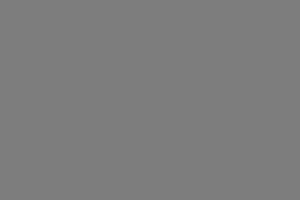

In [11]:
img = Image.new('RGB', (300, 200), (125, 125, 125))
img

In [12]:
def random_erasing(img,  p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=(125, 125, 125), inplace=False):
    """
    random erasing for pil image
    p – probability that the random erasing operation will be performed.
    scale – range of proportion of erased area against input image.
    ratio – range of aspect ratio of erased area.
    value – erasing value. Default is 0. If a single int, it is used to erase all pixels. If a tuple of length 3, it is used to erase R, G, B channels respectively. If a str of ‘random’, erasing each pixel with random values.
    
    """
    def get_params():
        img_w, img_h = img.size
        area = img_h * img_w
        for _ in range(10):
            erase_area = random.uniform(scale[0], scale[1]) * area
            aspect_ratio = random.uniform(ratio[0], ratio[1])
            h = int(round(math.sqrt(erase_area * aspect_ratio)))
            w = int(round(math.sqrt(erase_area / aspect_ratio)))
            if h < img_h and w < img_w:
                i = random.randint(0, img_h - h)
                j = random.randint(0, img_w - w)
                return i, j, h, w,
        return 0, 0, img_h, img_w
    if random.uniform(0, 1) < p:
        
        x, y, h, w =get_params()
        print(x, y, h, w)
        erase_img = Image.new('RGB', (w, h), value)
        if not inplace:
            copy_img = img.copy()
            copy_img.paste(erase_img, (y,x))
            return copy_img
        img.paste(erase_img, (y, x))
    return img

In [16]:
row = landmarks.loc[0]
img = Image.open(os.path.join(DIR_TEST, 'images', row['file_name']))
draw = ImageDraw.Draw(img)
box = row['rect_lips']
# box = expand_bbox(row['rect_lips'])
print(box, type(box))
img_crop = img.crop(box)

[403, 452, 498, 491] <class 'list'>


In [17]:
img_crop.size

(95, 39)

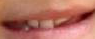

In [18]:
img_crop

13 0 69 56


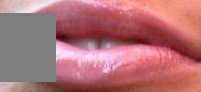

In [109]:
ers_img = random_erasing(img_crop)
ers_img

In [80]:
from torchvision import transforms

In [25]:
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
transforms.RandomErasing(),
transforms.ToPILImage()
])

AttributeError: module 'torchvision.transforms' has no attribute 'RandomErasing'